In [ ]:
from scipy.sparse import lil_matrix, kron, identity, csr_matrix, random
from scipy.sparse.linalg import eigsh, norm, svds
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
sig_x=np.array([[0,1],[1,0]])
sig_y=np.array([[0,-1j],[1j,0]])
sig_z=np.array([[1,0],[0,-1]])

In [ ]:
N=14

### Hamiltonian and Ground State

$$H=\sum_{<i j>} \sigma_i^x \sigma_j^x + \sigma_i^y \sigma_j^y + \sigma_i^z \sigma_j^z $$

In [ ]:
H2 = np.random.rand(4,4)-0.5 #(2*kron(sig_x,sig_x) + 0.3*kron(sig_y,sig_y) + kron(sig_z,sig_z))/3
H2 = (H2 + H2.T)/2

In [ ]:
H2 = csr_matrix(H2)

In [ ]:
H = H2.copy()
for i in range(N-2):
  H=kron(H,identity(2))+kron(identity(H.shape[0]//2),H2)

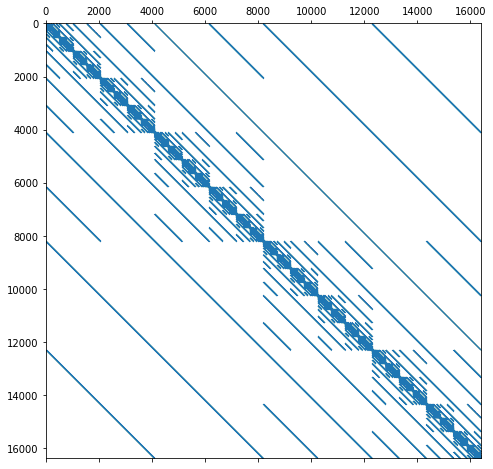

In [ ]:
plt.figure(figsize=(8,8))
plt.spy(H, markersize=0.1)
plt.show()

In [ ]:
tm=time.time()
l,v=eigsh(H, 2, which='SA') #Only one eigenvalue
print(time.time()-tm)

0.6960430145263672


In [ ]:
gs=v[:,0]

In [ ]:
#a,b=np.linalg.eigh(H.toarray())
#plt.plot(a)
#gs=b[:,0]

In [ ]:
keys=np.flip(np.argsort(np.abs(gs)))
for i in range(10):
  temp=bin(keys[i])[2:]
  print('0'*(N-len(temp))+temp, '\t', np.abs(gs[keys[i]])**2)

00000000000000 	 0.8309485763282518
10000000000000 	 0.038204588382556116
00000000000011 	 0.009064348687299958
11000000000000 	 0.008876014858104908
01000000000000 	 0.008020618072225174
00000000000001 	 0.005182171138518063
00000000000110 	 0.004944448276511086
00000001100000 	 0.004811613695889168
00000011000000 	 0.004811136240899532
00000000110000 	 0.004810339672566744


### AGSP

$$1-\frac{H}{||H||}$$

In [ ]:
eps = l[1]-l[0] #Energy of first excited state
Eg = l[0] #Energy of the ground state
#Q = H-Eg*identity(2**N)

u,s,vh=svds(H, k=1)
u = s #2-Norm of Q. Largest singular value of Q. 

A=identity(2**N)-H/u  #+eps)

### Invariance of Ground State

In [ ]:
gs_new = (A.dot(gs)).T
gs_new = gs_new.A[:,0]

In [ ]:
np.abs(np.dot(gs.conj(),gs_new)) #Overlap of gs_new with ground state

1.6265517834505199

[]

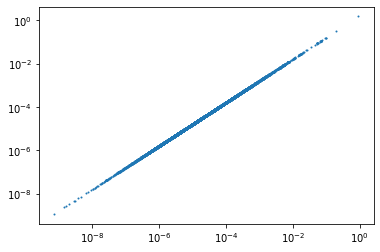

In [ ]:
plt.scatter(np.abs(gs),np.abs(gs_new),s=1)
plt.loglog()
#plt.ylim((1e-16,1))
#plt.xlim((1e-16,1))

### Entanglement

In [ ]:
def Entangle(psi):
  psi=np.reshape(psi,(2**(N//2),2**(N//2)))
  U,S,Vh=np.linalg.svd(psi)
  psi=np.reshape(psi,-1)
  S2=np.abs(S)
  EE=-np.sum(S2**2*np.log2(S2**2))
  return EE, S

In [ ]:
psi=(np.random.rand(2**N)-0.5)+1j*(np.random.rand(2**N)-0.5)
psi=psi/np.linalg.norm(psi)

In [ ]:
m=2         #Initial Bond dimension of MPS
d=2         

psi=(np.random.rand(d,m)-0.5)+1j*(np.random.rand(d,m)-0.5)

for i in range(N-2):
  temp=(np.random.rand(m,d,m)-0.5)+1j*(np.random.rand(m,d,m)-0.5)
  psi=np.tensordot(psi,temp,axes=([-1],[0]))

temp=(np.random.rand(m,d)-0.5)+1j*(np.random.rand(m,d)-0.5)
psi=np.tensordot(psi,temp,axes=([-1],[0]))

psi=psi.reshape(-1)

psi=psi/np.linalg.norm(psi)

In [ ]:
psi=(np.random.rand(2)-0.5) +1j*(np.random.rand(2)-0.5)
for i in range(N-1):
  psi0=(np.random.rand(2)-0.5) +1j*(np.random.rand(2)-0.5)
  psi=np.kron(psi,psi0)
psi=psi/np.linalg.norm(psi)

-6.406853007628456e-16


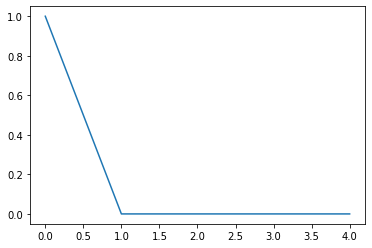

In [ ]:
EE,S=Entangle(psi)
print(EE)
plt.plot(S[:5])

In [ ]:
Energy_hist=[]
Overlap_hist=[]
EE_hist=[]
S_hist=[]

psi_new = psi

for i in range(200):
  EE,S=Entangle(psi_new)
  EE_hist.append(EE)
  S_hist.append(S)
  Energy_hist.append(np.real(np.dot(psi_new.conj(),H.dot(psi_new))))
  Overlap_hist.append(np.abs(np.dot(gs.conj(),psi_new)))

  psi_new = A.dot(psi_new)
  psi_new=np.reshape(psi_new.A,-1)
  psi_new=psi_new/np.linalg.norm(psi_new) #Normalization

S_hist=np.array(S_hist).T

### Plots

In [ ]:
EE,S=Entangle(gs)

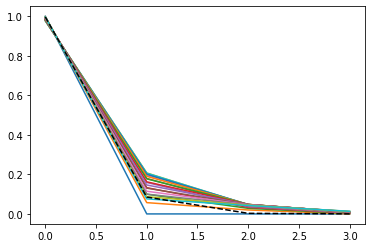

In [ ]:
#(i,j): (Schmidt coefficient, # of iterations)
plt.plot(S_hist[:4,:20])
plt.plot(S[:4],'k--')
plt.show()

In [ ]:
eps, Eg, u

(0.5194637221326932, -4.67014530978622, array([7.45372599]))

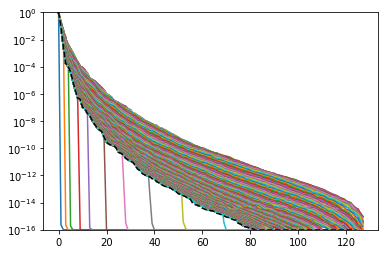

In [ ]:
plt.semilogy(S_hist[:,:])
plt.semilogy(S[:],'k--')
plt.ylim((1e-16,1))
plt.show()

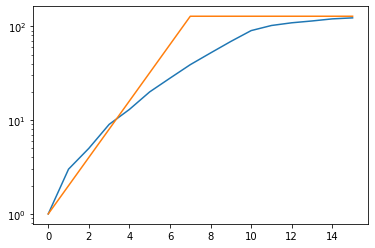

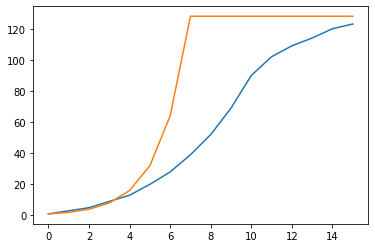

In [ ]:
ER=np.count_nonzero(S_hist>1e-15, axis=0)
k=16
plt.semilogy(ER[:k])
temp=[]
for i in range(k):
  temp.append(2**min(i, N//2))
plt.semilogy(temp)
plt.show()

plt.plot(ER[:k])
temp=[]
for i in range(k):
  temp.append(2**min(i, N//2))
plt.plot(temp)
plt.show()

In [ ]:
ER

array([  1,   3,   5,   9,  13,  20,  28,  39,  52,  69,  90, 102, 109,
       114, 120, 123, 125, 126, 126, 127, 127, 127, 127, 127, 127, 126,
       126, 126, 126, 125, 124, 124, 123, 122, 121, 121, 120, 119, 118,
       118, 117, 116, 116, 115, 115, 113, 112, 111, 111, 111, 110, 109,
       108, 107, 107, 106, 104, 103, 103, 102, 102, 101, 100,  99,  98,
        98,  97,  96,  96,  95,  94,  94,  93,  92,  92,  92,  92,  92,
        91,  91,  90,  89,  89,  88,  87,  87,  87,  86,  86,  86,  85,
        85,  84,  84,  84,  84,  83,  83,  83,  82,  82,  82,  81,  81,
        81,  81,  80,  80,  80,  79,  79,  79,  79,  79,  79,  79,  79,
        79,  79,  78,  78,  78,  77,  77,  77,  77,  77,  76,  76,  76,
        76,  76,  76,  76,  76,  76,  76,  76,  75,  75,  75,  75,  75,
        75,  75,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,  74,
        74,  74,  74,  73,  73,  73,  73,  73,  73,  73,  73,  73,  72,
        72,  72,  72,  72,  72,  72,  72,  72,  72,  72,  72,  7

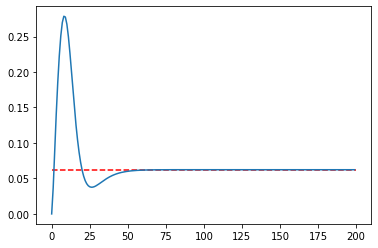

In [ ]:
plt.plot(EE_hist)
EE0,S0=Entangle(gs)
plt.hlines(EE0,0,200,colors='r',linestyles='dashed')
plt.show()

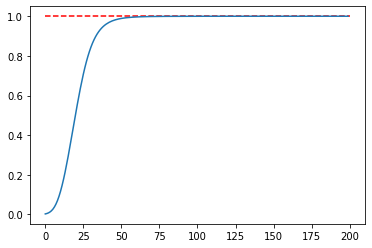

In [ ]:
plt.plot(Overlap_hist)
plt.hlines(1,0,200,colors='r',linestyles='dashed')
plt.show()

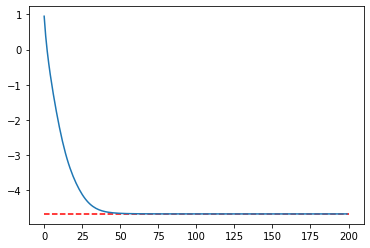

In [ ]:
plt.plot(Energy_hist)
plt.hlines(Eg,0,200,colors='r',linestyles='dashed')
plt.show()